In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import math

In [2]:
def iterateErrorOverTime(data, target, func) :
    output = []
    #index = 0
    for i in range(len(data)) :
        output.append(func(data[i], target[i], 1))
        #index = index + 1
    return output

def iterateError(data, target, func) :
    output = []
    #index = 0
    for i in range(len(data)) :
        output.append(func(data[i], target[i]))
        #index = index + 1
    return output

def sumData(x,y) :
    return x + y

def diff(x,y):
    return x - y

def integral(d,i,k) :
    return (k * i) * 1/d

In [3]:
class PID :
    pGain = 0
    iGain = 0
    dGain = 0
    target = 0
    err = 0
    output = 0
    dataIn = 0
    integSum = 0
    derPast = 0
    time = 0
        
    pOut = 0
    iOut = 0
    dOut = 0
    
    #def __init__(self, pGain, iGain, dGain, target) :
        # Main Params
        #self.pGain = pGain
        #self.iGain = iGain
        #self.dGain = dGain
        #self.target = target
        #self.err = 0
        #self.output = 0
        #self.dataIn = 0
        #self.integSum = 0
        #self.derPast = dGain
        #self.time = 0
        
        #self.pOut = 0
        #self.iOut = 0
        #self.dOut = 0
        
    def __init__(self, pGain, iGain, dGain) :
        self.pGain = pGain
        self.iGain = iGain
        self.dGain = dGain
        
    def Control(self, data):
        self.Proportion(data)
        self.Integral(data)
        self.Derive(data)
        
        return self.pOut + self.iOut + self.dOut

    def Proportion(self, data):
        self.dataIn = data
        self.err = self.target - data
        self.pOut = self.err * self.pGain
        
    def Integral(self, data):
        self.integSum = (self.integSum + self.err) * self.iGain
        
        self.iOut = self.integSum
        
    def Derive(self, value):
        if value != 0 :
            der = (value - self.derPast) / self.time
            self.derPast = value
            self.dOut = der * self.dGain
    
    def Print(self) :
        print("P: {} I: {} D: {}".format(self.pOut, self.iOut, self.dOut))

In [4]:
### Data Modification ###

def saturate(i) :
    if i > 5 :
        return 5
    elif i < 0 :
        return 0
    return i

def noise(d, n) :
    return d + (rng.random() * n)

In [5]:
### Print Data ###

def printOutput(output, pid) :
    for d in output :
        print(round(d, 6))
        print(pid.Print())
        
def printPass(currentValue, pid) :
    print("Current: {}".format(currentValue))
    print(pid.Print())

In [6]:
def testFunc(m, func) :
    data = []
    for x in range(m):
        data.append(func(x,m))
    return data

def function_A(x,y) :
    return math.sin(math.radians(math.pow(x, 0.2)))

In [7]:
### Initialize PID ###

pid_1 = PID(0.5,0.2,0.1)
pid_1.time = 1
pid_1.target = 50
pid_1_output = []

current = 0
for i in range(200):
    #if i == 50 :
    #    current = 25
    if i > 25 and i < 100 :
        current = noise(current, 1)
    
    pid_1_Command = pid_1.Control(current)
    current = current + pid_1_Command
    #current = saturate(current)
    pid_1_output.append(current)
    printPass(current, pid_1)

#printOutput(pid_output, pid_1)

Current: 35.0
P: 25.0 I: 10.0 D: 0
None
Current: 51.0
P: 7.5 I: 5.0 D: 3.5
None
Current: 52.9
P: -0.5 I: 0.8 D: 1.6
None
Current: 51.22
P: -1.4499999999999993 I: -0.41999999999999976 D: 0.18999999999999986
None
Current: 50.114
P: -0.6099999999999994 I: -0.32799999999999974 D: -0.16799999999999998
None
Current: 49.858
P: -0.05699999999999861 I: -0.0883999999999994 D: -0.11060000000000017
None
Current: 49.91412
P: 0.0710000000000015 I: 0.010720000000000724 D: -0.025600000000000026
None
Current: 49.981992
P: 0.04294000000000153 I: 0.01932000000000076 D: 0.0056119999999999955
None
Current: 50.0052488
P: 0.0090040000000009 I: 0.007465600000000513 D: 0.006787200000000127
None
Current: 50.00539344
P: -0.002624399999998417 I: 0.0004433600000007358 D: 0.0023256799999998635
None
Current: 50.001721168
P: -0.0026967199999994307 I: -0.0009900159999996251 D: 1.446400000020276e-05
None
Current: 49.99995112
P: -0.0008605840000015519 I: -0.0005422368000005458 D: -0.0003672271999995758
None
Current: 49.

In [12]:

pid_2 = PID(-0.6,-0.6,0.5)
#testinput = testFunc(7000,function_A)
testInput = 50
pid_2.time = 1
pid_2_output = []

for i in range(len(testinput)) :
    pid_2_Command = pid_2.Control(testinput[i])
    pid_2_output.append(pid_2_Command)
    #printPass(pid_2_Command, pid_2)
    
#print(testinput)

In [13]:
def setLabels(axis):
    axis.set_title("PID Testing")
    axis.set_xlabel("Time")
    axis.set_ylabel("Value")

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

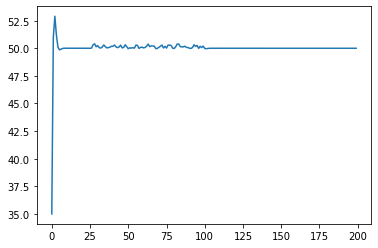

In [15]:
figure, axis = plt.subplots()
axis.plot(range(len(pid_1_output)), pid_1_output)
axis.plot(range(testInput), testInput)
setLabels(axis)

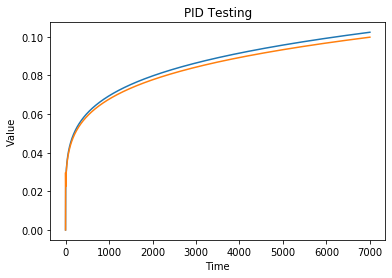

In [11]:
figPID_2, axis_2 = plt.subplots()
axis_2.plot(range(len(testinput)), testinput)
axis_2.plot(range(len(pid_2_output)), pid_2_output)
setLabels(axis_2)

In [ ]:
### OLD Data ###

targetData = [1,3,6,2,5,7,5,2,4]
inputData =  [1,3,4,2,4,5,5,3,4]
diffError = iterateError(inputData, targetData, diff)
error = iterateErrorOverTime(inputData, targetData, integral)
time = range(len(inputData))

In [ ]:
### OLD Plots

figure, axis = plt.subplots()
axis.plot(time,targetData)
axis.plot(time,inputData)
axis.plot(time,error)
axis.plot(time,diffError)
setLabels(axis)

In [ ]:
launchFigure, launchAxis = plt.subplots()
testOutput = testFunc(70000,function_A)
launchAxis.plot(range(len(testOutput)), testOutput)